In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train_1D = x_train.reshape(len(x_train), 784)
x_train_1D = x_train_1D/255
x_test_1D = x_test.reshape(len(x_test), 784)
x_test_1D = x_test_1D/255

In [9]:
model =keras.Sequential( [ keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') ] )
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train_1D, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 666us/step - loss: 0.2497 - accuracy: 0.9308
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2476 - accuracy: 0.9316
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2465 - accuracy: 0.9319
Epoch 4/5
1875/1875 [==============================] - 1s 644us/step - loss: 0.2451 - accuracy: 0.9322
Epoch 5/5
1875/1875 [==============================] - 1s 630us/step - loss: 0.2445 - accuracy: 0.9331


In [15]:
y_pred = model.predict(x_test_1D)

In [18]:
y_pred[0]

array([1.0298789e-03, 2.4131273e-09, 3.9092302e-03, 9.7506821e-01,
       8.7636709e-04, 1.4679703e-01, 3.3518228e-09, 9.9984723e-01,
       7.4314237e-02, 7.5266933e-01], dtype=float32)

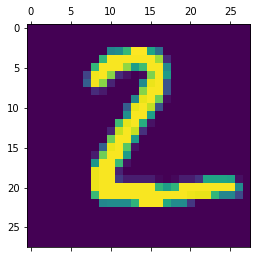

In [21]:
plt.matshow(x_test[1])

In [24]:
np.argmax(y_pred[1])

2

In [27]:
y_pred[:]

array([[1.02987885e-03, 2.41312725e-09, 3.90923023e-03, ...,
        9.99847233e-01, 7.43142366e-02, 7.52669334e-01],
       [2.26497203e-01, 6.18317723e-03, 9.99729276e-01, ...,
        2.81112170e-17, 7.84047246e-02, 3.29426495e-14],
       [9.79891556e-05, 9.95533288e-01, 6.48982048e-01, ...,
        1.57463551e-02, 3.16175848e-01, 3.08340788e-02],
       ...,
       [8.63794241e-07, 3.10445017e-07, 4.69118357e-04, ...,
        1.64259225e-01, 6.39127314e-01, 8.15200925e-01],
       [3.95631741e-06, 1.69823597e-05, 5.10505743e-06, ...,
        1.18707685e-05, 6.28160834e-01, 5.48875460e-06],
       [2.98202038e-04, 5.19395204e-12, 7.29887187e-02, ...,
        3.31157817e-13, 1.71709107e-05, 1.37452305e-09]], dtype=float32)

In [30]:
y_pred_lbls = [np.argmax(y_pred[i]) for i in range(10000)]

In [33]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_lbls)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    7,    4,    3,    2,    0],
       [   0, 1117,    3,    3,    0,    1,    3,    2,    6,    0],
       [   7,    9,  913,   21,    7,    4,   12,   10,   45,    4],
       [   2,    0,   12,  930,    0,   24,    2,   10,   23,    7],
       [   1,    1,    5,    2,  913,    0,    8,    5,    9,   38],
       [   8,    2,    1,   38,    6,  776,   13,    7,   34,    7],
       [  11,    3,    6,    2,    7,   17,  909,    1,    2,    0],
       [   1,    7,   21,    7,    5,    1,    0,  945,    4,   37],
       [   7,   12,    5,   21,    9,   24,    6,    9,  870,   11],
       [  11,    8,    1,    8,   16,    5,    0,   15,    6,  939]],
      dtype=int32)>

In [36]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

Text(69.0, 0.5, 'Predicted')

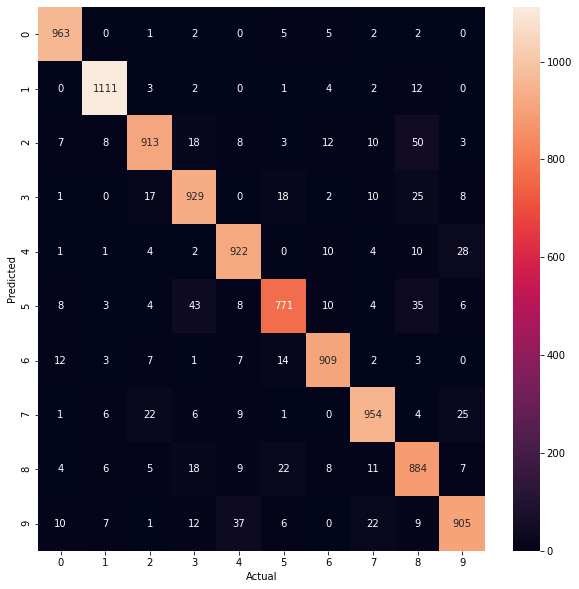

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [18]:
model = keras.Sequential([keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                         keras.layers.Dense(10, activation='sigmoid')])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_1D, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 749us/step - loss: 0.2721 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 1s 745us/step - loss: 0.1251 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 1s 746us/step - loss: 0.0869 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 1s 746us/step - loss: 0.0666 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 1s 745us/step - loss: 0.0523 - accuracy: 0.9843


In [28]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(100, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')])


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 732us/step - loss: 20.2991 - accuracy: 0.0988
Epoch 2/10
1875/1875 [==============================] - 1s 727us/step - loss: 20.2774 - accuracy: 0.0987
Epoch 3/10
1875/1875 [==============================] - 1s 715us/step - loss: 20.2774 - accuracy: 0.0987
Epoch 4/10
1875/1875 [==============================] - 1s 726us/step - loss: 20.2774 - accuracy: 0.0987
Epoch 5/10
1875/1875 [==============================] - 1s 779us/step - loss: 20.2774 - accuracy: 0.0987
Epoch 6/10
1875/1875 [==============================] - 2s 908us/step - loss: 20.2774 - accuracy: 0.0987
Epoch 7/10
1875/1875 [==============================] - 2s 868us/step - loss: 20.2774 - accuracy: 0.0987
Epoch 8/10
1875/1875 [==============================] - 1s 749us/step - loss: 20.2774 - accuracy: 0.0987
Epoch 9/10
1875/1875 [==============================] - 2s 813us/step - loss: 20.2774 - accuracy: 0.0987
Epoch 10/10
1875/1875 [==============================] 